# Author - Loorthu Infenda
# The Sparks Foundation: Data Science & Business Analytics Tasks
# TASK 2 - Prediction using Unsupervised ML

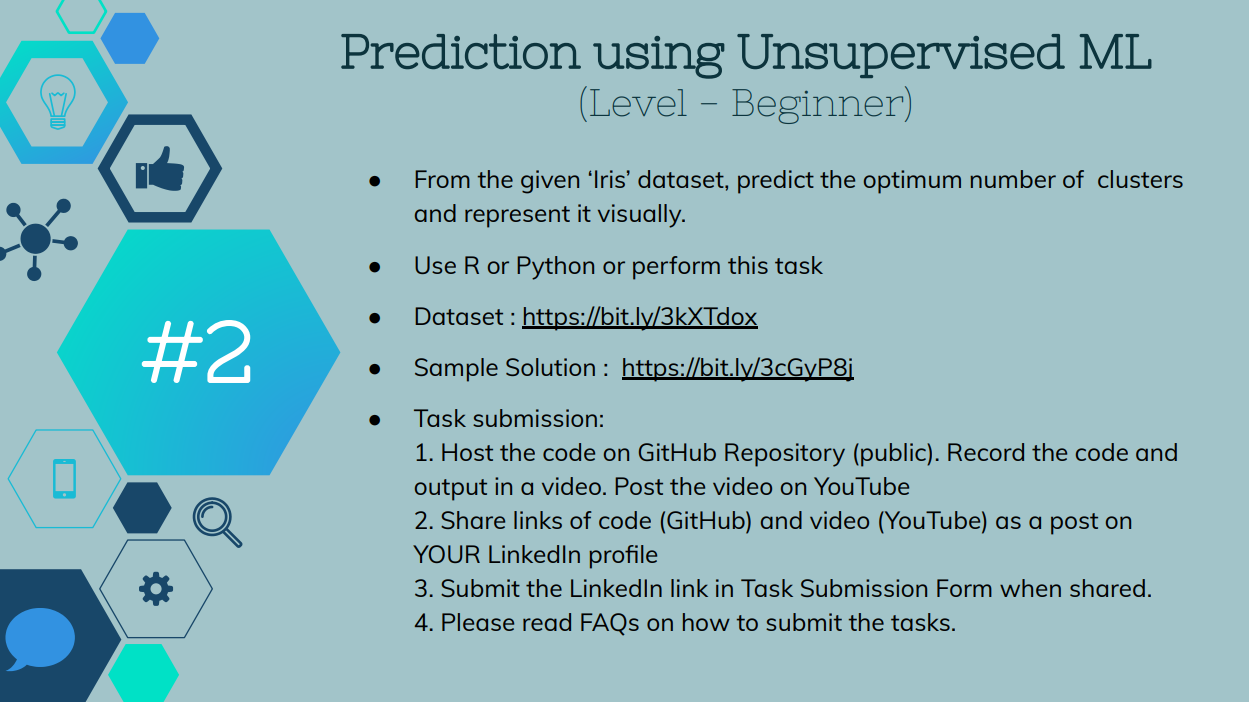

Importing all the required libraries

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

Importing the dataset

In [25]:
df = pd.read_csv('/content/Iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


No null values

In [26]:
df.shape

(150, 6)

In [27]:
df.duplicated().sum()

0

No Duplicate values

In [28]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


* **Data Visualization**

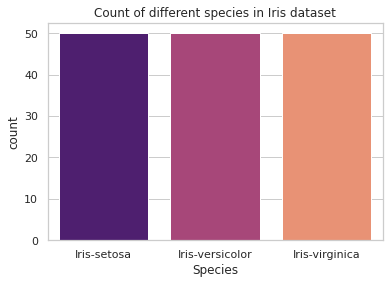

In [29]:
sns.countplot(x='Species', data=df, palette="magma")
plt.title("Count of different species in Iris dataset")
plt.show()

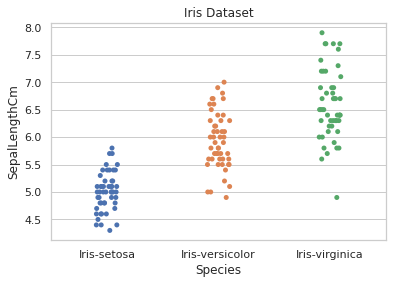

In [30]:
sns.set(style = 'whitegrid')
ax = sns.stripplot(x ='Species',y = 'SepalLengthCm',data = df);
plt.title('Iris Dataset')
plt.show()

<AxesSubplot:>

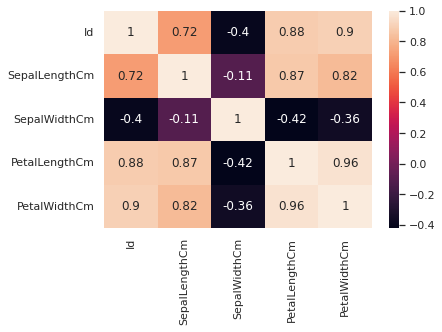

In [31]:
sns.heatmap(df.corr(), annot = True, linecolor='black')

Finding numbers of Clusters for Kmeans

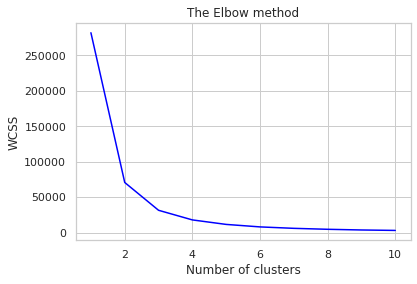

In [32]:
A=df.iloc[:, [0,1,2,3]].values
WCSS=[]
for i in range(1,11):
    km=KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 10).fit(A)
    WCSS.append(km.inertia_)
    
plt.plot(range(1, 11), WCSS, color='blue')
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

* **Training the model**

In [33]:
kM = KMeans(n_clusters= 3,init = 'k-means++',max_iter = 300,n_init = 10,random_state= 10)
y_km = kM.fit_predict(A)

* **Cluster Visualization**

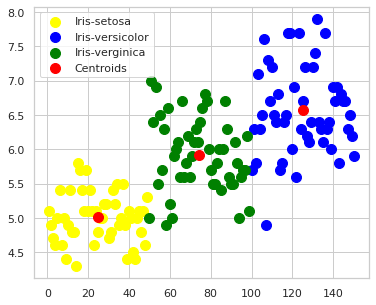

In [34]:
plt.figure(figsize = (6,5))

plt.scatter(A[y_km == 0,0], A[y_km == 0,1] , s = 100,c = 'yellow',label = 'Iris-setosa')
plt.scatter(A[y_km == 1,0], A[y_km == 1,1] , s = 100,c = 'blue',label = 'Iris-versicolor')
plt.scatter(A[y_km == 2,0], A[y_km == 2,1] , s = 100,c = 'green',label = 'Iris-verginica')

plt.scatter(kM.cluster_centers_[:,0],kM.cluster_centers_[:,1],s = 100,c = 'red',label = 'Centroids')
plt.legend()
plt.show()